In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
import os


In [2]:
indir = "../data/13_25_nside2048_ksz_proper/"
Nside = 2048; Npix = hp.nside2npix(Nside);
reso = hp.nside2resol(Nside)
mmin = 13.0; mmax = 20.0

Nc_z = np.loadtxt("data/Nc_list.dat")
Mmin_z = np.loadtxt("data/Mmin_list.dat")
Mmax_z = np.loadtxt("data/Mmax_list.dat")

ibin = np.arange(0,100.1, 2, dtype='int')
Nbin = len(ibin) - 1


In [3]:
edges = np.array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

z_edges = 1./edges - 1.
zbin = (z_edges[1:] + z_edges[:-1])/2.


/home/tanimura/anaconda3/envs/pytorch37/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == "":


In [6]:
lmax = 4096
ymap = np.zeros(Npix)
for I in range(10, 50):
    
    fname = indir+"kmap_paint_nside%d_imin%d_imax%d_mmin%.1f_mmax%.1f.fits" %(Nside, ibin[I], ibin[I+1], mmin, mmax)
    is_file = os.path.isfile(fname)
    
    if is_file:
        print("Imin=%d, Imax=%d, z=%.3f" %(ibin[I], ibin[I+1], zbin[ibin[I]]))
        ymap_i = hp.read_map(indir+"kmap_paint_nside%d_imin%d_imax%d_mmin%.1f_mmax%.1f.fits" %(Nside, ibin[I], ibin[I+1], mmin, mmax))  #/(1+zbin[ibin[I]+1])**3
        
        print("kmap_i:", np.sum(ymap_i))
        ymap = ymap + ymap_i
    else: 
        print("missing file: %s " %(fname))
        pass


missing file: ../data/13_25_nside2048_ksz_proper/kmap_paint_nside2048_imin20_imax22_mmin13.0_mmax20.0.fits 
Imin=22, Imax=24, z=3.447
kmap_i: -0.00018437721148773515
missing file: ../data/13_25_nside2048_ksz_proper/kmap_paint_nside2048_imin24_imax26_mmin13.0_mmax20.0.fits 
Imin=26, Imax=28, z=2.775
kmap_i: -0.00011901990192924577
Imin=28, Imax=30, z=2.510
kmap_i: -1.0542368771066933e-05
missing file: ../data/13_25_nside2048_ksz_proper/kmap_paint_nside2048_imin30_imax32_mmin13.0_mmax20.0.fits 
Imin=32, Imax=34, z=2.078
kmap_i: 0.0006758178955571422
Imin=34, Imax=36, z=1.899
kmap_i: -0.002469237456476485
Imin=36, Imax=38, z=1.740
kmap_i: -0.001471509509555762
Imin=38, Imax=40, z=1.598
kmap_i: 0.00016799543202325202
Imin=40, Imax=42, z=1.470
kmap_i: 0.00013911011489324549
Imin=42, Imax=44, z=1.353
kmap_i: 0.000221972212001195
Imin=44, Imax=46, z=1.247
kmap_i: 0.006452652170140025
Imin=46, Imax=48, z=1.151
kmap_i: 0.008471120615040073
Imin=48, Imax=50, z=1.062
kmap_i: 0.007802052000902609


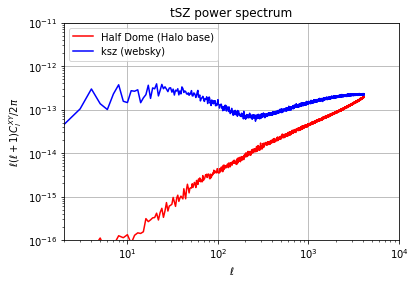

In [9]:
# SZ map from Websky simulations
Tcmb0 = cosmo.Tcmb0.value * 1e6 # [uK]
ymap_websky = hp.read_map("/gpfs02/work/tanimura/data/sims/websky/ksz.fits")/Tcmb0

cl = hp.anafast(ymap, lmax=lmax)
cl_websky = hp.anafast(ymap_websky, lmax=lmax)
ell = np.arange(len(cl))
fact = ell*(ell+1)/(2.*np.pi)

fig, ax = plt.subplots()
ax.plot(ell, fact*cl, 'r', label="Half Dome (Halo base)")    
plt.loglog(ell, fact*cl_websky, 'b', label="ksz (websky)")    

ax.set_xlim([2,10000])
ax.set_ylim([1e-16,1e-11])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$\ell$")
ax.set_ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi$")
ax.set_title(r"tSZ power spectrum")
ax.legend(loc='upper left')
ax.grid()


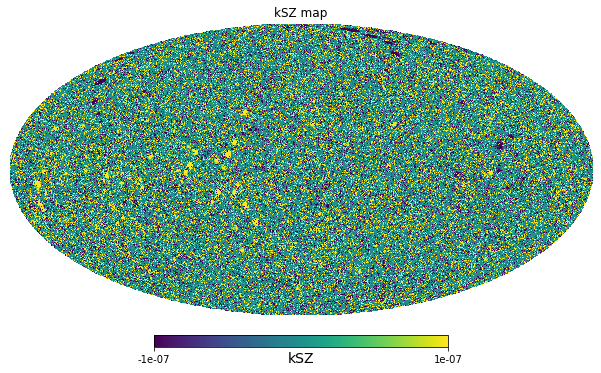

In [11]:
hp.mollview(ymap, min=-1e-7, max=1e-7, title='kSZ map', unit='kSZ' )